In [2]:
import xarray 
import os
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import imdlib as imd
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.io
import matplotlib.image as mpimg
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


In [3]:
cluster8_1 = pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\CSV Excel Data\SSTA 8 Cluster Number 1901-2010.csv",index_col=0)
cluster8_2 = pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\CSV Excel Data\SSTA 8 Cluster Number 2011-2022.csv",index_col=0)

In [4]:
cluster_8=pd.concat([cluster8_1,cluster8_2])
cluster_8=cluster_8.set_index(i for i in range(122))

In [5]:
cluster8_1['Cluster Number'].unique()

array([3, 7, 0, 1, 5, 4, 6, 2], dtype=int64)

In [6]:
cluster_8['Cluster Number'] = cluster_8['Cluster Number'].replace(0,10)
cluster_8['Cluster Number'] = cluster_8['Cluster Number'].replace(1,11)
cluster_8['Cluster Number'] = cluster_8['Cluster Number'].replace(2,12)
cluster_8['Cluster Number'] = cluster_8['Cluster Number'].replace(3,13)
cluster_8['Cluster Number'] = cluster_8['Cluster Number'].replace(4,14)
cluster_8['Cluster Number'] = cluster_8['Cluster Number'].replace(5,15)
cluster_8['Cluster Number'] = cluster_8['Cluster Number'].replace(6,16)
cluster_8['Cluster Number'] = cluster_8['Cluster Number'].replace(7,17)

In [7]:
cluster_8['Cluster Number'] = cluster_8['Cluster Number'].replace(13,1)
cluster_8['Cluster Number'] = cluster_8['Cluster Number'].replace(17,2)
cluster_8['Cluster Number'] = cluster_8['Cluster Number'].replace(10,3)
cluster_8['Cluster Number'] = cluster_8['Cluster Number'].replace(11,4)
cluster_8['Cluster Number'] = cluster_8['Cluster Number'].replace(15,5)
cluster_8['Cluster Number'] = cluster_8['Cluster Number'].replace(14,6)
cluster_8['Cluster Number'] = cluster_8['Cluster Number'].replace(16,7)
cluster_8['Cluster Number'] = cluster_8['Cluster Number'].replace(12,8)

In [8]:
# cluster_8['Cluster Number'] = cluster_8['Cluster Number'].replace(7,8)
# cluster_8['Cluster Number'] = cluster_8['Cluster Number'].replace(6,7)
# cluster_8['Cluster Number'] = cluster_8['Cluster Number'].replace(5,6)
# cluster_8['Cluster Number'] = cluster_8['Cluster Number'].replace(4,5)
# cluster_8['Cluster Number'] = cluster_8['Cluster Number'].replace(3,4)
# cluster_8['Cluster Number'] = cluster_8['Cluster Number'].replace(2,3)
# cluster_8['Cluster Number'] = cluster_8['Cluster Number'].replace(1,2)
# cluster_8['Cluster Number'] = cluster_8['Cluster Number'].replace(0,1)


# # cluster_8['Cluster Number'] = cluster_8['Cluster Number'].replace(0,1)
# # cluster_8['Cluster Number'] = cluster_8['Cluster Number'].replace(1,2)
# # cluster_8['Cluster Number'] = cluster_8['Cluster Number'].replace(2,3)
# # cluster_8['Cluster Number'] = cluster_8['Cluster Number'].replace(3,4)
# # cluster_8['Cluster Number'] = cluster_8['Cluster Number'].replace(4,5)
# # cluster_8['Cluster Number'] = cluster_8['Cluster Number'].replace(5,6)
# # cluster_8['Cluster Number'] = cluster_8['Cluster Number'].replace(6,7)
# # cluster_8['Cluster Number'] = cluster_8['Cluster Number'].replace(7,8)

C:\Users\ratho\AppData\Local\Temp\ipykernel_19172\2669242974.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(cluster_8.index, cluster_8['Cluster Number'], c=cluster_8['Cluster Number'].map(colors), cmap='viridis', s=50)  # Adjust 's' for marker size


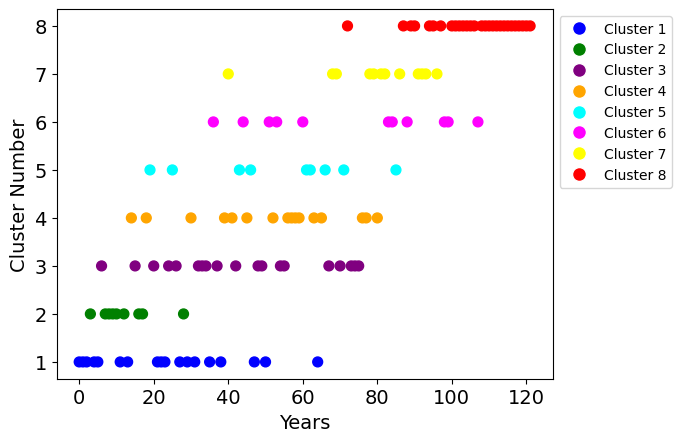

In [21]:
# Define a color map for your clusters
colors = {1: 'blue', 2: 'green', 3: 'purple', 4: 'orange', 5: 'cyan', 6: 'magenta', 7: 'yellow',8:'red'}

# Create a scatter plot with larger markers (s parameter)
plt.scatter(cluster_8.index, cluster_8['Cluster Number'], c=cluster_8['Cluster Number'].map(colors), cmap='viridis', s=50)  # Adjust 's' for marker size

# Add labels and title
plt.xlabel('Years',fontsize=14)
plt.ylabel('Cluster Number',fontsize=14)
# plt.title('8 Clusters Scatter Plot of SST')

# Show the color legend

legend_labels = {cluster: color for cluster, color in colors.items() if cluster in cluster_8['Cluster Number'].unique()}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}', markerfacecolor=color, markersize=10) for cluster, color in legend_labels.items()]
plt.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(1, 1))
plt.tick_params(axis='y', labelsize=14)
plt.tick_params(axis='x', labelsize=14)
plt.savefig("Figure 9 - Scatter Plot of Cluster Numbers obtained from SST Data in a chronological order",bbox_inches='tight')
# Display the plot
plt.show()

In [2]:
ssta1=pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\CSV Excel Data\SSTA Category 1901-2010.csv",index_col=0)
ssta2=pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\CSV Excel Data\SSTA Category 2011-2022.csv",index_col=0)

In [5]:
ssta=pd.concat([ssta1,ssta2])
ssta=ssta.set_index(i for i in range(122))

In [6]:
mean_sst=ssta.mean(axis=1)

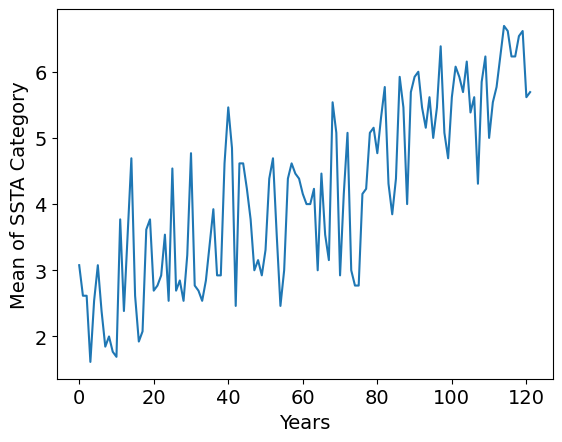

In [9]:
plt.plot(mean_sst)
# plt.title("Mean of SST Category of 12 Regions")
plt.xlabel("Years",fontsize=14)
plt.ylabel("Mean of SSTA Category",fontsize=14)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.savefig("Mean")